In [50]:
# Importing necessary Libraries
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
iris_df = pandas.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


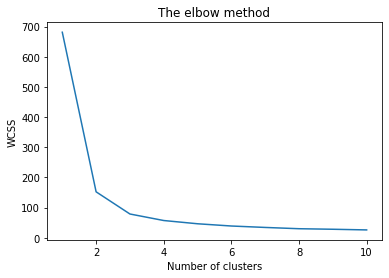

In [25]:
# Finding the most optimal value of 'k' for k-means classification
x = iris_df.iloc[:, :].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    k = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
               random_state = 0)
    k.fit(x)
    wcss.append(k.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow method, it is evident that k = 3 would be the optimum number of clusters.

In [51]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, 
                random_state = 0)
KMmodel = kmeans.fit_predict(x)

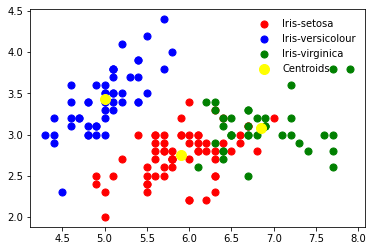

In [45]:
# Visualising the clusters
plt.scatter(x[KMmodel == 0, 0], x[KMmodel == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[KMmodel == 1, 0], x[KMmodel == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[KMmodel == 2, 0], x[KMmodel == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc = 'upper right', frameon = False)